Analyse the **Heart Disease** dataset to predict the presence of heart disease
using logistic regression.  
  
The dataset contains medical information about individuals, and the goal is  
to explore how various factors contribute to the likelihood of heart disease.  
Link to the data set: [heart disease link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [208]:
# we want now to check the corelation between variables by the corelation matrix
# needed dependence
install.packages("reshape2")
library(reshape2)
library(ggplot2)

# for our distribution plots
library(gridExtra)
library(gridExtra)
# for bar plot won multiple columns
library(tidyr)
library(pROC)

Installing package into ‘/home/student/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




## Load dataset

In [149]:
# we sated by importing the dataset
df <- read.csv(file = "../../data/heart.csv",sep=",")

We used the **read.csv()** function to read our data after dowloading and placed them into a specific folder.  
  
  

In [150]:
# check for some few observations
head(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


By this we get a brief overview about the content and the type of values in  our data_set an.

In [151]:
# check a the description of each column
str(df)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


We notice that we get :  
    14 variables which are all integers except the variable **oldpeak** which is numererical  
    1025 observations in the dataset 

description of the variables according to [[1]](https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf)

| column name | meanin/labeled | values used for this variables |
|-------------|---------|--------------------------------|
|Age|age|measure in years| 
|Sexe|sex|0: for woman , 1: man|
|Chest Pain|cp|0: for typical angina , 1: for atypical angina, 2: for non-anginal pain, 3: for asymptomatic|
|Resting Blood Preasure|trestbps|Measure in mm Hg|
|Cholesterol|chol|Measure in mg/dl|
|Fasting Blood sugar|fbs|(if greater than 120 mg/dl) :1 for true, :0 for false |
|Resting Electrocardiogram|restecg|1: for Nomal , 0: for abnormality , 2: Probable or definite left ventricular hypertrophy|
|Maximum Heart|thalach|Heart rate achieved during the patient's stress testing|
|Exercise induced Ingima|exang|0: for no , 1: for yes|
|Stress Test Depression|oldpeak|Numeric value signifying the marker for adverse cardiac events|
|Slope for peak exercise|slope|2: for upsloping , 0: for flat, 1: for down-sloping|
|Number of Major Vessels|ca|Number of major vessels [0-3] colored by fluoroscopy|
|Thalium heart rate|thal|3:Normal, 2:Fixed defect, 1:Reversable defect, 0:bellow the target HR|
|Heart prediction|target|1: Heart disease , 0: No Heart disease|

## Data cleanin

In [ ]:
# we check for missing values
missing_vals <- sum(is.na(df))
cat("Number of missing values: ",missing_vals)

Number of missing values:  0

By this we can see that there is not missing values in our data set

[1] 1 0

In [ ]:
# check for duplicate rows
number_duplicates <- sum(duplicated.data.frame(df))
cat("Number of duplicated rows: ",number_duplicates)

Number of duplicated rows:  723

Ths means that in our data set there are only 1025 - 723 rows that are unique.

In [ ]:
# we get only the uniques rows to performe our analysis
df_uniques <- unique.data.frame(df)
head(df_uniques)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [ ]:
# check the new dim of our sample to verify if it have realy 1025 - 723 rows.
cat("The new data set has",dim(df_uniques)[1],"rows and",dim(df_uniques)[2],"variables")

The new data set has 302 rows and 14 variables

By this we observed that only "slope" and "oldpeak" are corelated

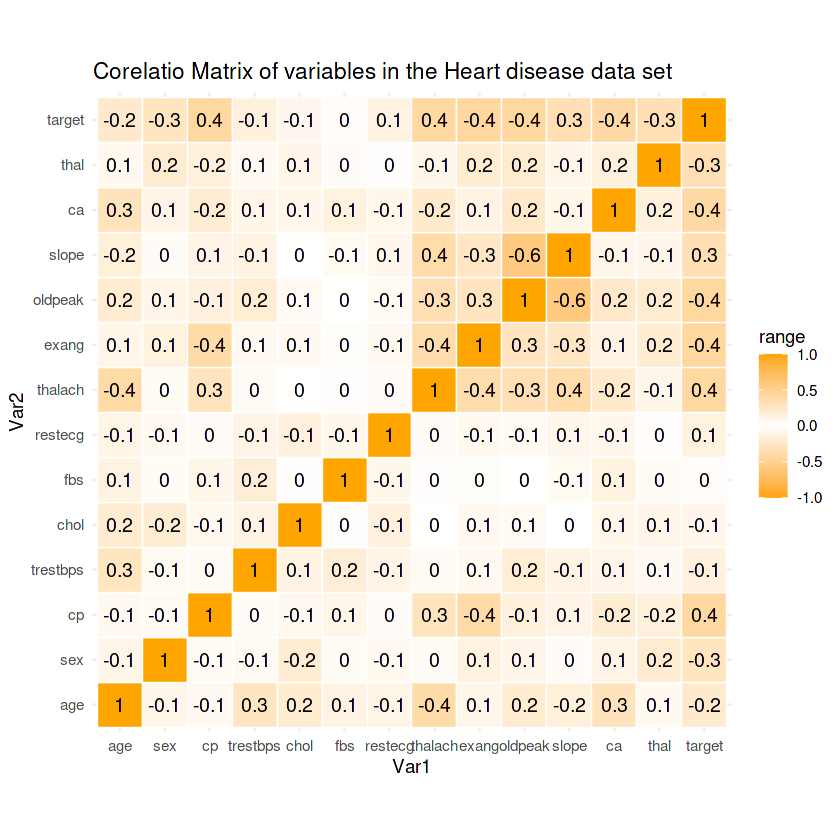

In [ ]:
# we construct a corelation
cor_matrix_df <- cor(df_uniques)

# we set our data to a good format for the corelation plot with ggplot
cor_matrix_df <- melt(cor_matrix_df)

# we contruct ou plot
plot_cor_matrix_df <- ggplot(cor_matrix_df,aes(x=Var1,y=Var2, fill=value))+
    geom_tile(color="white",size=0.3)+
    geom_text(aes(label=round(value,1)),color="black",size=4)+
    scale_fill_gradient2(low="orange",high="orange",mid="white",midpoint=0,limit=c(-1,1),space="Lab",name="range")+
    theme_minimal()+
    labs(title = "Corelatio Matrix of variables in the Heart disease data set")+
    coord_fixed()

# we save our plot to add it in our report
ggsave("cor_plot.png",plot_cor_matrix_df,width=11,height=9, dpi=500,bg="white")

#we show now our plot
plot_cor_matrix_df

In [ ]:
# Now we selected some variables on which we are going to perform our analysis
# we choose arbitrary the following variables target,age,sex,cp and chol
final_df <- df_uniques[c("age","sex","cp","chol","target")]
head(final_df)

,age,sex,cp,chol,target
,<int>,<int>,<int>,<int>,<int>
1,52,1,0,212,0
2,53,1,0,203,0
3,70,1,0,174,0
4,61,1,0,203,0
5,62,0,0,294,0
6,58,0,0,248,1


In [ ]:
# Now we convert the cathegorial variable and the target variable into factor
final_df$sex <- as.factor(final_df$sex)
final_df$cp <- as.factor(final_df$cp)
final_df$target <- as.factor(final_df$target)
str(final_df)

'data.frame':	302 obs. of  5 variables:
 $ age   : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex   : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 2 2 2 ...
 $ cp    : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ chol  : int  212 203 174 203 294 248 318 289 249 286 ...
 $ target: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...


In [ ]:
# size of our final data set
cat("The new data set has",dim(final_df)[1],"rows and",dim(final_df)[2],"variables")

The new data set has 302 rows and 5 variables

## Exploratory data analysis of the final data set

In [ ]:
# Now we check some few statistic about our selected variables
summary(final_df)

      age             sex               cp              chol      
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   :126.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:211.0  
 Median :55.50   Median :1.0000   Median :1.0000   Median :240.5  
 Mean   :54.42   Mean   :0.6821   Mean   :0.9636   Mean   :246.5  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:274.8  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :564.0  
     target     
 Min.   :0.000  
 1st Qu.:0.000  
 Median :1.000  
 Mean   :0.543  
 3rd Qu.:1.000  
 Max.   :1.000  

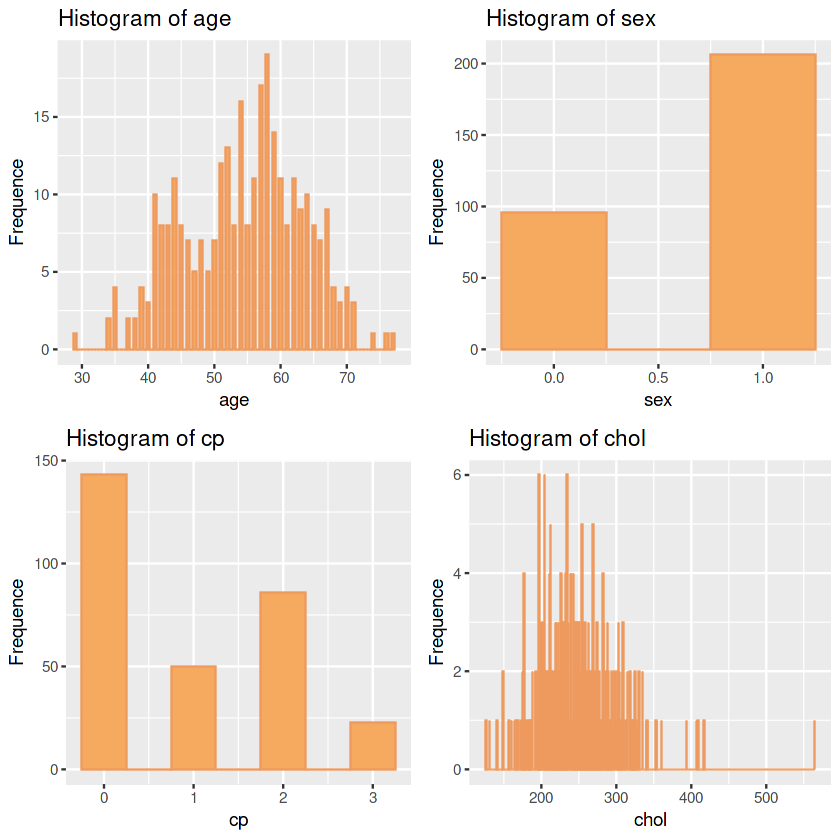

In [ ]:
# check distribution of our selected descriptors ( which are all random variable )
train_plots <- list()
variables<-colnames(final_df)
for (name in variables[1:4]){
  hist_plot <- ggplot(final_df, aes_string(x = name)) +
    geom_histogram(binwidth = 0.5, fill = "#f5aa5f", color = "#ee9a5e") +
    labs(title = paste("Histogram of", name), x = name, y = "Frequence")

  train_plots[[length(train_plots) + 1]] <- hist_plot
}

grid.arrange(grobs = train_plots, ncol = 2)


### barplot of chest pain with respect to target

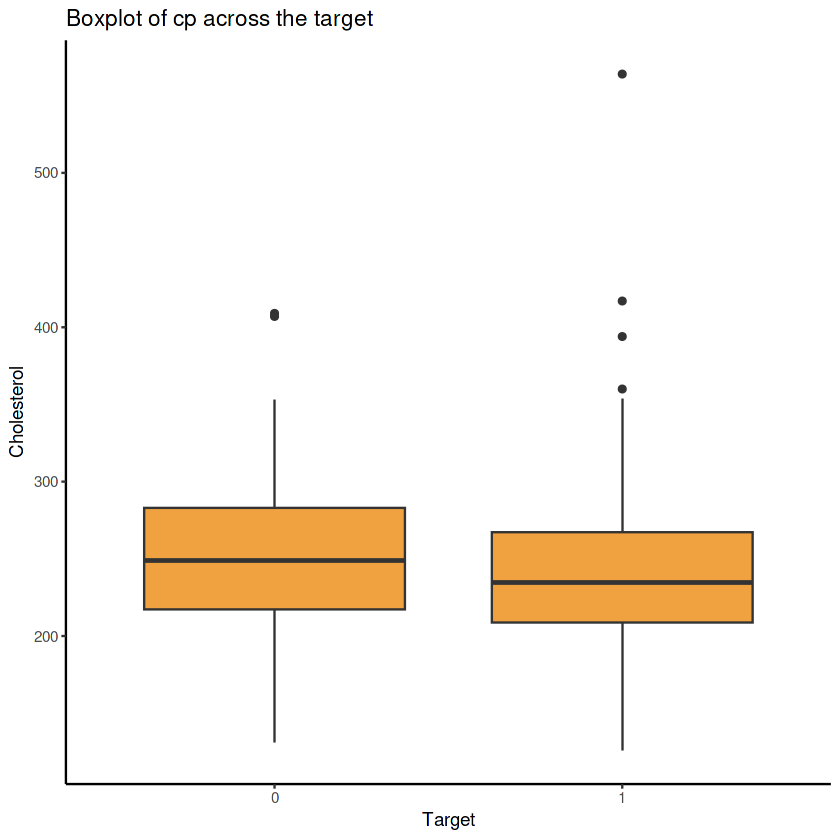

In [ ]:

# Boxplot of mpg by the number of cylinders
ggplot(final_df, aes(x = target, y = chol)) +
  geom_boxplot(fill = "#f1a240") +
  labs(title = "Boxplot of cp across the target",
       x = "Target",
       y = "Cholesterol") +
  theme_classic()

In this plot we can see that the proprtion of people who don't get the disease  
but with a significant level of  cholesterol is big than the proportion of people  
who have heart disease with a less quantity of cholesterol.  
We also observe that there are some people who have heart disease  
but with a very big level of cholesterol.


### barplot of sexe respect to target

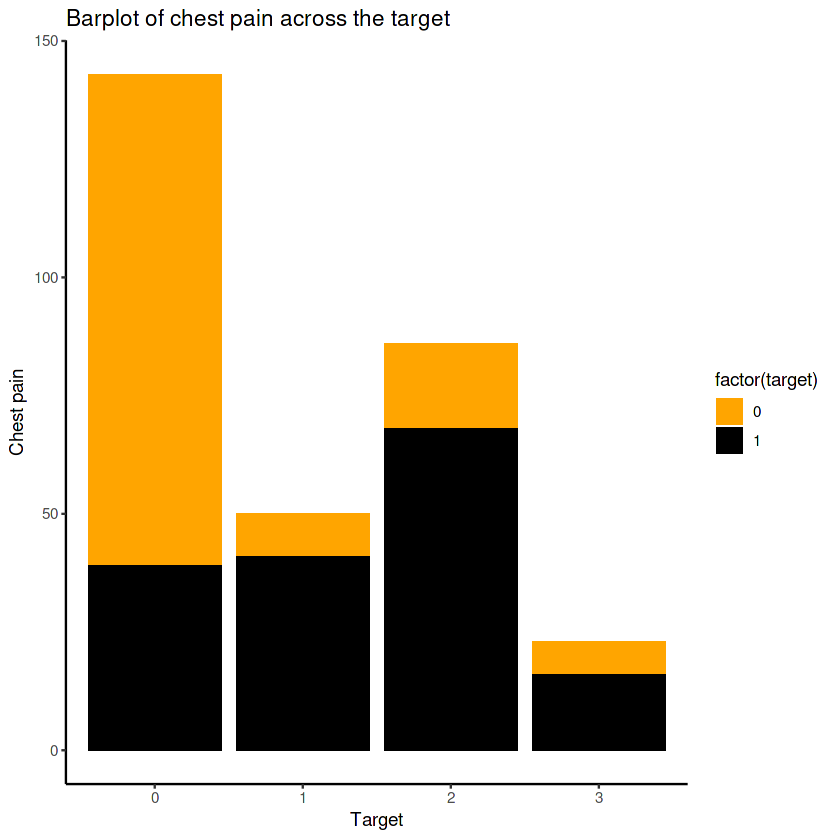

In [ ]:
ggplot(final_df, aes(x =cp,fill=factor(target))) +
  geom_bar(position = "stack") +
  labs(title = "Barplot of chest pain across the target",
       x = "Target",
       y = "Chest pain") +
       scale_fill_manual(values = c("orange","black"))+
  theme_classic()

On this plot we can see that between the different type of chest pain there are:  
- relatively a small proportion of people who have chest pain of type 0 and get heart heart disease  
- for the chest pain 1,2 and 3 we have a significant proportion of people who have heart disease  
compare to those who don't get heart disease.

this implies that there is diffrence in the heart prevalance of chest pain 0 and chest pain (1,2,3)

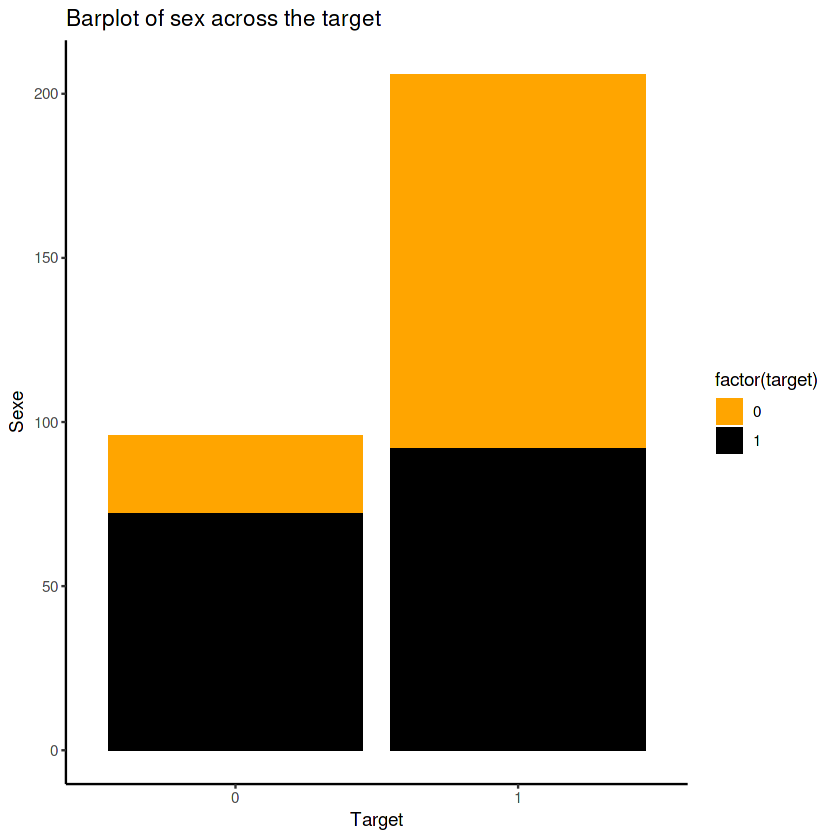

In [ ]:
ggplot(final_df, aes(x = sex, fill = factor(target))) +
  geom_bar(position = "stack") +
  labs(title = "Barplot of sex across the target",
       x = "Target",
       y = "Sexe") +
       scale_fill_manual(values = c("orange","black"))+
  theme_classic()

By this plot we can see that:
- for the female the proportion of those who have heart disease is more important  
than the proportion of those who don't have the disease.
- for the male the proportion is also more for those who have the disease but not significantly

This can be interprate as wemen get more chance to get the disease than men  
so there is a difference in heart disease prevalance of wemen and men  

## Fiting a logistic regression model

We start by spliting our data into train and test

In [164]:
sample_index <- sample(1:nrow(final_df),0.7*nrow(final_df))
train_set <- final_df[sample_index, ]
test_set <- final_df[-sample_index, ]
# we check the dimension of each set
cat("Dimension of the train set:",dim(train_set)[1],"Observations and ",dim(train_set)[2],"features \n")
cat("Dimension of the test set :",dim(test_set)[1],"Observations and ",dim(test_set)[2],"features \n")

Dimension of the train set: 211 Observations and  5 features 
Dimension of the test set : 91 Observations and  5 features 


We build now our model and train him in the train_set

In [165]:
# Fit a logistic model to predict target with age, sex, cp and chol
logistic_model <- glm(target ~ age + sex + cp + chol, data= train_set, family ="binomial")
# we check the summary of our model
cat(" Summary of the logistic model on train_set \n")
summary(logistic_model)

 Summary of the logistic model on train_set 



Call:
glm(formula = target ~ age + sex + cp + chol, family = "binomial", 
    data = train_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5423  -0.5596   0.1567   0.6667   2.2980  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.814485   1.677713   4.062 4.87e-05 ***
age         -0.090683   0.024600  -3.686 0.000228 ***
sex1        -2.349896   0.485715  -4.838 1.31e-06 ***
cp1          3.061000   0.576775   5.307 1.11e-07 ***
cp2          2.691461   0.469921   5.727 1.02e-08 ***
cp3          3.014264   0.722424   4.172 3.01e-05 ***
chol        -0.006421   0.003547  -1.810 0.070238 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 291.14  on 210  degrees of freedom
Residual deviance: 174.77  on 204  degrees of freedom
AIC: 188.77

Number of Fisher Scoring iterations: 5


### Interpration of the summary


### Here we can see that:

### for the p-value and the Estimate:
- **age, sex, cp1, cp2** and **cp3** are hyghly significant since their p-values are less than 0.0001.
- the **age** and **sex1**(being a man) decrease highly-significantly the log-odds  respectivly at(0.0906 and 2.349) when they increase.
- the **cp1,cp2** and **cp3**(have the chest pain of type 1,2 or 3) increase highly-significantly the log-odds.
- the **chol** is marginaly significant which means that we can leave this variable out that will not have  
a strong effect on our model. Because high value of **chol** reduce the log-odds but the effect (0.070238) is not significant.  

### for the residual:  
- We can see that our model reduce very well the deviance compare to the null model which implies a that our model fit well the data:  
null-deviance=291.14, residual-deviance=174.7.

#### about the AIC we can't say anything if we dont have another model  to compare their AIC values which aims to see which is the best.



## Model interpratation  

In [174]:
# we convert the coeffitients into ratio
coefs <- exp(coef(logistic_model))
coefs <- data.frame(coefs)
coefs

,coefs
,<dbl>
(Intercept),910.94704085
age,0.91330681
sex1,0.09537908
cp1,21.34889966
cp2,14.75322155
cp3,20.37409213
chol,0.99360004


### Insighth:
As we said up here by this we can see clearly that:
- the variable sex and cp have significant effect on the odds but here it seems like the chol is also significant  

In [176]:
# build a reduce model without the chol
reduce_model <- glm(target ~ age + sex + cp , data= train_set, family = "binomial")
# let's check its own summary
cat(" Summary of the reduce logistic model on train_set \n")
summary(reduce_model)

 Summary of the reduce logistic model on train_set 



Call:
glm(formula = target ~ age + sex + cp, family = "binomial", data = train_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4317  -0.5304   0.1952   0.6222   2.4640  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.30893    1.40777   3.771 0.000162 ***
age         -0.09529    0.02412  -3.951 7.80e-05 ***
sex1        -2.10167    0.45152  -4.655 3.25e-06 ***
cp1          3.02573    0.57024   5.306 1.12e-07 ***
cp2          2.69408    0.46362   5.811 6.21e-09 ***
cp3          3.02896    0.71747   4.222 2.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 291.14  on 210  degrees of freedom
Residual deviance: 178.08  on 205  degrees of freedom
AIC: 190.08

Number of Fisher Scoring iterations: 5


In [177]:
# we perform a anova test to see which of the two model is the best
anova(reduce_model,logistic_model, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,205,178.0758,NA,NA,NA
2,204,174.7651,1,3.310727,0.06882905


### Explanation:
- By this we can confirm that add the chol variable doesn't affect our model  
since the **p-value** (0.06882905) is greater than 0.05.
- So if we don't compare the **AIC** or the **BIC** of the two models we can say that it is better to chose the reduce_model 


### Model prediction and Performance:

In [201]:
# we test now the performance of the model over the test_set first
# predicted probabilities
test_set$prob <- predict(reduce_model,newdata=test_set ,type = "response")
# probabilities to predicted class
test_set$predicted <- ifelse(test_set$prob > 0.5, 1, 0)

# Confusion matrix
conf_matrx <- table(Predicted = test_set$predicted, Actual= test_set$target)
conf_matrx

         Actual
Predicted  0  1
        0 30 19
        1 11 31

In [202]:
# accuracy, number of false positive and false negative 
cat(" Accuracy :",(conf_matrx[1]+conf_matrx[4])/(conf_matrx[1]+
                                                 conf_matrx[4]+conf_matrx[2]+conf_matrx[3]),"\n")
cat("False Positive :", conf_matrx[3],"\n")
cat("False Negative :", conf_matrx[2],"\n")


 Accuracy : 0.6703297 
False Positive : 19 
False Negative : 11 


In [206]:
# Now we do the same thing over all the observations
# predicted probabilities
final_df$prob <- predict(reduce_model,newdata=final_df ,type = "response")
# probabilities to predicted class
final_df$predicted <- ifelse(final_df$prob > 0.5, 1, 0)

# Confusion matrix
conf_matrx2 <- table(Predicted = final_df$predicted, Actual= final_df$target)
conf_matrx2

         Actual
Predicted   0   1
        0 107  35
        1  31 129

In [207]:
cat(" Accuracy :",(conf_matrx2[1]+conf_matrx2[4])/(conf_matrx2[1]+
                                                   conf_matrx2[4]+conf_matrx2[2]+conf_matrx2[3]),"\n")
cat("False Positive :", conf_matrx2[3],"\n")
cat("False Negative :", conf_matrx2[2],"\n")

 Accuracy : 0.781457 
False Positive : 35 
False Negative : 31 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



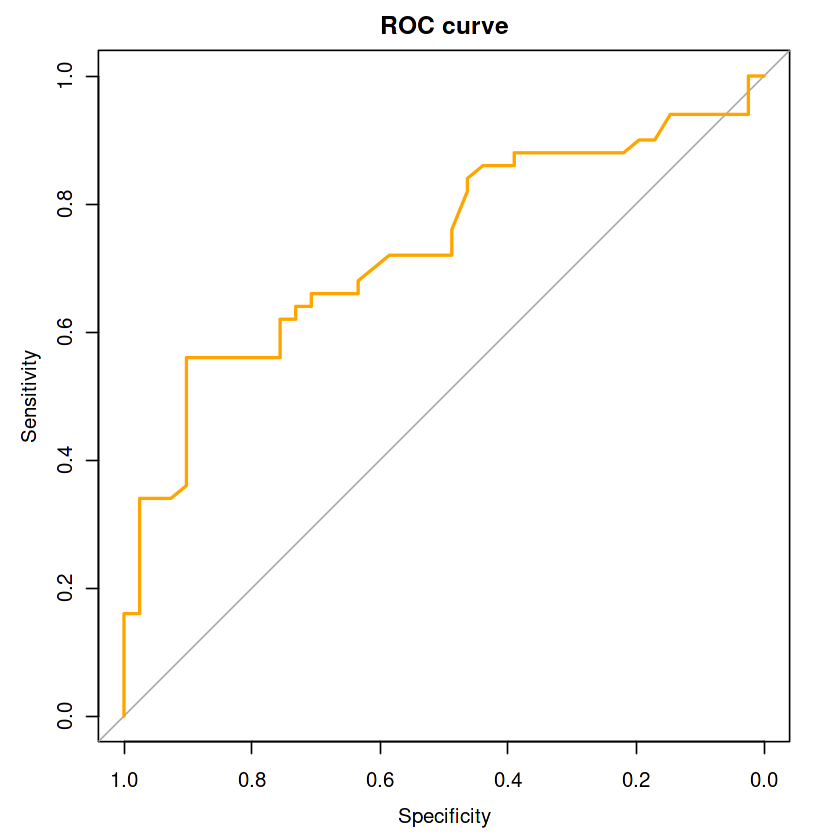

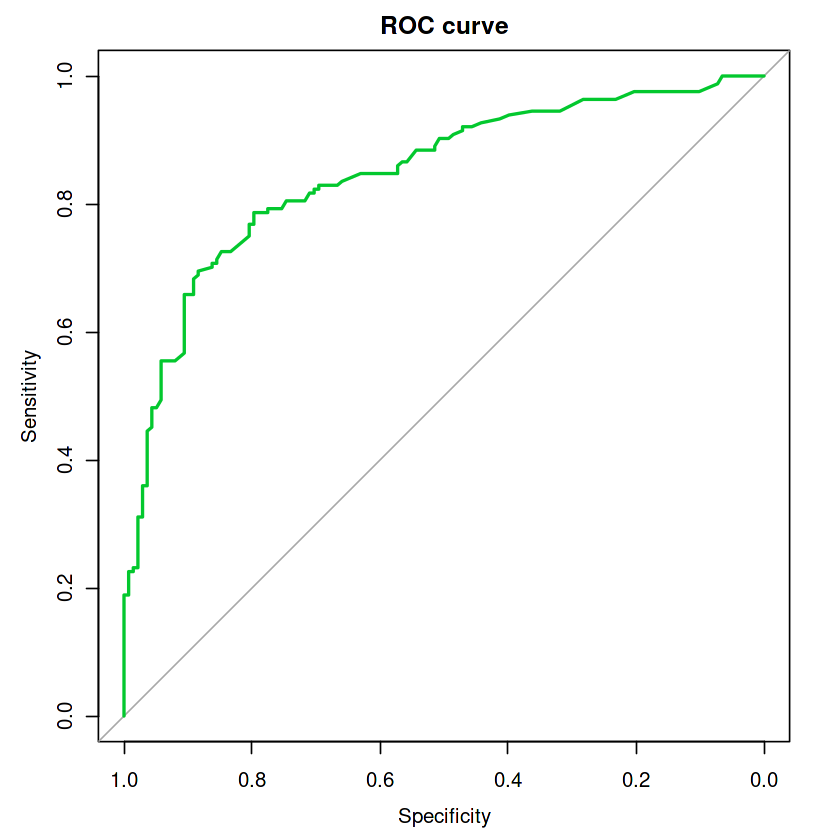

In [211]:
### ROC curve over the test_set and the full observation
# over the test_set
roc__ <- roc(test_set$target,test_set$prob)
plot(roc__ , main="ROC curve" , col="orange",lwd = 2)
# over all the observations
roc__2 <- roc(final_df$target,final_df$prob)
plot(roc__2, main="ROC curve" , col="#03c82e",lwd = 2)

In [214]:
# AUC only on the test_set
cat("AUC on the test :",auc(roc__))

AUC on the test : 0.7317073

The AUC tel us about our model discriminative ability between the different label of the target.  
Here we can see that our model has an AUC relatively close to one  
but this is not enough for us to say than it has good ability of discrimination between get or not the disease. 